# <ins>Air Quality Prediction Using Machine Learning:<ins>
## PM2.5 Pollutant Concentration Prediction Based on Meteorological Data and Other Pollutants (PM10 and CO) Concentration

In [30]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob

## <ins>Introduction<ins>

Air pollution is a big issue in today's society. This project aims to leverage the use of machine learning to predict pollution level and air quality of the city of Phoenix, Arizona. The PM2.5 pollutant concentration will be predicted based on meteorolical data and also the concentration of other pollutants (PM10, CO). A web app was created to make prediction based on values entered by the user. 
    
Five pollutants were used in this analysis:
- Particulate Matter (PM2.5)
- Particulate Matter (PM10)
- Nitrogen Dioxide (NO2)
- Ozone (O3)
- Carbon monoxide (CO)

The data used is totally different than that used in other codes available in Github and Kaggle. Therefore, the data cleaning steps and analysis covered in this project are different than what is published online. In addition, I created an interactive app that diplays PM2.5 concentration predictions based on values entered by user. 
    
<ins>Datasets references:<ins>
- United States Environmental Protection Agency(EPA): https://www.epa.gov/outdoor-air-quality-data/download-daily-data (for daily air quality data)
- Wunderground: https://www.wunderground.com/weather/KPHX (for meteorological data)
    
<ins>Python libraries used:<ins>
- Pandas, Numpy, Matplotlib, Sklearn, Seaborn, Sklearn, os, glob, Streamlit



## I. <ins> Import pollulant concentration data for the year 2022 + Data Cleaning</ins>

### 1. Checking the dataframe in its initial state 

In [35]:
PM10_conc=pd.read_csv("phoenix/PM10_phoenix_2022.csv")
PM10_conc

,Date,Source,Site ID,POC,Daily Mean PM10 Concentration,UNITS,DAILY_AQI_VALUE,Site Name,DAILY_OBS_COUNT,PERCENT_COMPLETE,AQS_PARAMETER_CODE,AQS_PARAMETER_DESC,CBSA_CODE,CBSA_NAME,STATE_CODE,STATE,COUNTY_CODE,COUNTY,SITE_LATITUDE,SITE_LONGITUDE
0,01/01/2022,AQS,40130019,1,11,ug/m3 SC,10,WEST PHOENIX,1,100.0,81102,PM10 Total 0-10um STP,38060,"Phoenix-Mesa-Scottsdale, AZ",4,Arizona,13,Maricopa,33.48378,-112.14256
1,01/03/2022,AQS,40130019,1,39,ug/m3 SC,36,WEST PHOENIX,1,100.0,81102,PM10 Total 0-10um STP,38060,"Phoenix-Mesa-Scottsdale, AZ",4,Arizona,13,Maricopa,33.48378,-112.14256
2,01/04/2022,AQS,40130019,1,35,ug/m3 SC,32,WEST PHOENIX,1,100.0,81102,PM10 Total 0-10um STP,38060,"Phoenix-Mesa-Scottsdale, AZ",4,Arizona,13,Maricopa,33.48378,-112.14256
3,01/05/2022,AQS,40130019,1,48,ug/m3 SC,44,WEST PHOENIX,1,100.0,81102,PM10 Total 0-10um STP,38060,"Phoenix-Mesa-Scottsdale, AZ",4,Arizona,13,Maricopa,33.48378,-112.14256
4,01/06/2022,AQS,40130019,1,54,ug/m3 SC,50,WEST PHOENIX,1,100.0,81102,PM10 Total 0-10um STP,38060,"Phoenix-Mesa-Scottsdale, AZ",4,Arizona,13,Maricopa,33.48378,-112.14256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,12/27/2022,AQS,40130019,1,56,ug/m3 SC,51,WEST PHOENIX,1,100.0,81102,PM10 Total 0-10um STP,38060,"Phoenix-Mesa-Scottsdale, AZ",4,Arizona,13,Maricopa,33.48378,-112.14256
355,12/28/2022,AQS,40130019,1,20,ug/m3 SC,19,WEST PHOENIX,1,100.0,81102,PM10 Total 0-10um STP,38060,"Phoenix-Mesa-Scottsdale, AZ",4,Arizona,13,Maricopa,33.48378,-112.14256
356,12/29/2022,AQS,40130019,1,22,ug/m3 SC,20,WEST PHOENIX,1,100.0,81102,PM10 Total 0-10um STP,38060,"Phoenix-Mesa-Scottsdale, AZ",4,Arizona,13,Maricopa,33.48378,-112.14256
357,12/30/2022,AQS,40130019,1,19,ug/m3 SC,18,WEST PHOENIX,1,100.0,81102,PM10 Total 0-10um STP,38060,"Phoenix-Mesa-Scottsdale, AZ",4,Arizona,13,Maricopa,33.48378,-112.14256


### <ins>Discussion</ins>

#### By analyzing the above dataframe corresponding to the daily air quality summary statistics for the PM10 pollutants, It can be seen that the dataframe contains:
- 20 columns and among which only 3 ("Date", "Daily Mean PM10 Concentration" and "UNITS") will be useful for our study
- Contains only 359 rows, therefore, the data is missing for some days of the years. 

#### In the coming parts, we will do some data cleaning to prepare our datasets for further analysis. The data cleaning steps include:
- Retain useful columns
- Rename some columns to add more information and avoid repetition when merged with other dataframes
- Convert date column to datetime 
- Add all missing days in the table
- Replace the missing values by preceding values (using the forward fill method)
- Some pollutants had more than one observation per day. For these cases, only the last observation was retained


### 2. <ins>Data cleaning<ins>

In [36]:
path = "phoenix/"
csv_files = os.listdir(path)
csv_files=[file for file in csv_files if "csv" in file] # use list comprehension to keep only csv files
csv_files

['CO_phoenix_2022.csv',
 'NO2_phoenix_2022.csv',
 'ozone_phoenix_2022.csv',
 'PM10_phoenix_2022.csv',
 'PM2.5_phoenix_2022.csv']

In [37]:
# assign dataset names
list_of_names = csv_files 
 
# create empty list
df_concentration= []

for i in range(len(list_of_names)):
    conc_df = pd.read_csv(path+list_of_names[i])
    # retain column name for "pollutant's concentration"and "units"
    column_name = conc_df.iloc[:,4].name
    unit = conc_df.iloc[0,5]
    # Only keep the "Date", pollutant concentration columns
    conc_df =  conc_df.iloc[:,[0,4]]
    ## Rename the pollutants' concentration column to include the units
    conc_df.rename(columns={column_name: column_name + " " + "("+ unit+ ")"},inplace = True)
    ## Drop duplicated values 
    conc_df=conc_df.drop_duplicates(subset=["Date"]) 
    ## Convert date column to datetime 
    conc_df['Date'] = pd.to_datetime(conc_df['Date'])
    conc_df=conc_df.set_index(['Date'])
    new_date_range = pd.date_range(start="2022-01-01", end="2022-12-31", freq="D")
    ## Add all missing days in the table
    conc_df=conc_df.reindex(new_date_range)
    ## Replace the missing values by preceding values 
    conc_df = conc_df.fillna(method="ffill")
    df_concentration.append(conc_df)

### 3. Display every dataframe and its corresponding pollutant name + Merge all dataframes

In [38]:
### Extract the names of the single files 
names= [i[:-4] for i in csv_files] ## only keep the file names 

### Initialize the dataframe and diplay it 
pollutants_concentration = df_concentration[0]
print("\033[1m"  +  "For " + names[0] +  ":" + "\033[0m")
display(pollutants_concentration)

### Display other dataframe
for i in range(1, len(df_concentration)):
    print("\033[1m"  +  "For " + names[i] +  ":" + "\033[0m")
    #print(names[i])
    names[i]=df_concentration[i]
    display(names[i])
    ## merge the dataframes
    pollutants_concentration = pollutants_concentration.merge(names[i], left_index=True, right_index=True, how="left")

For CO_phoenix_2022:


,Daily Max 8-hour CO Concentration (ppm)
2022-01-01,0.1
2022-01-02,1.2
2022-01-03,1.5
2022-01-04,1.2
2022-01-05,1.5
...,...
2022-12-27,2.3
2022-12-28,2.2
2022-12-29,0.6
2022-12-30,0.7


For NO2_phoenix_2022:


,Daily Max 1-hour NO2 Concentration (ppb)
2022-01-01,17.0
2022-01-02,32.0
2022-01-03,38.0
2022-01-04,38.0
2022-01-05,39.0
...,...
2022-12-27,39.0
2022-12-28,34.0
2022-12-29,29.0
2022-12-30,26.0


For ozone_phoenix_2022:


,Daily Max 8-hour Ozone Concentration (ppm)
2022-01-01,0.043
2022-01-02,0.036
2022-01-03,0.025
2022-01-04,0.023
2022-01-05,0.023
...,...
2022-12-27,0.016
2022-12-28,0.020
2022-12-29,0.018
2022-12-30,0.019


For PM10_phoenix_2022:


,Daily Mean PM10 Concentration (ug/m3 SC)
2022-01-01,11.0
2022-01-02,11.0
2022-01-03,39.0
2022-01-04,35.0
2022-01-05,48.0
...,...
2022-12-27,56.0
2022-12-28,20.0
2022-12-29,22.0
2022-12-30,19.0


For PM2.5_phoenix_2022:


,Daily Mean PM2.5 Concentration (ug/m3 LC)
2022-01-01,6.3
2022-01-02,6.3
2022-01-03,22.6
2022-01-04,18.5
2022-01-05,24.8
...,...
2022-12-27,22.1
2022-12-28,11.5
2022-12-29,11.3
2022-12-30,13.8


### 4. Display merged dataframe 

In [39]:
pollutants_concentration

,Daily Max 8-hour CO Concentration (ppm),Daily Max 1-hour NO2 Concentration (ppb),Daily Max 8-hour Ozone Concentration (ppm),Daily Mean PM10 Concentration (ug/m3 SC),Daily Mean PM2.5 Concentration (ug/m3 LC)
2022-01-01,0.1,17.0,0.043,11.0,6.3
2022-01-02,1.2,32.0,0.036,11.0,6.3
2022-01-03,1.5,38.0,0.025,39.0,22.6
2022-01-04,1.2,38.0,0.023,35.0,18.5
2022-01-05,1.5,39.0,0.023,48.0,24.8
...,...,...,...,...,...
2022-12-27,2.3,39.0,0.016,56.0,22.1
2022-12-28,2.2,34.0,0.020,20.0,11.5
2022-12-29,0.6,29.0,0.018,22.0,11.3
2022-12-30,0.7,26.0,0.019,19.0,13.8


## II. <ins>Analyze Evolution of Pollutants Concentration with Time<ins>

### 1. Convert all pollutants' concentration to µg/m3

##### Before plotting the pollutants concentrations with respect to time we need to have consistent units. For that, we use the following conversion factors: 

- Carbon monoxide (CO)	===> 1 ppb = 1.15 µg/m3
- Nitrogen dioxide (NO2) ===> 1 ppb = 1.88 µg/m3
- Ozone (O3) ===> 1 ppb = 1.96 µg/m3

Also, 1 ppm = 1000 ppb


ref: https://www.breeze-technologies.de/blog/air-pollution-how-to-convert-between-mgm3-%C2%B5gm3-ppm-ppb/

In [40]:
pollutants_concentration["Daily Max 8-hour CO Concentration (ug/m3)"]=pollutants_concentration["Daily Max 8-hour CO Concentration (ppm)"].apply(lambda x: x*1.15*1000)
pollutants_concentration["Daily Max 1-hour NO2 Concentration (ug/m3)"]=pollutants_concentration["Daily Max 1-hour NO2 Concentration (ppb)"].apply(lambda x: x*1.88)
pollutants_concentration["Daily Max 8-hour Ozone Concentration (ug/m3)"]=pollutants_concentration["Daily Max 8-hour Ozone Concentration (ppm)"].apply(lambda x: x*1.96*1000)
pollutants_concentration

,Daily Max 8-hour CO Concentration (ppm),Daily Max 1-hour NO2 Concentration (ppb),Daily Max 8-hour Ozone Concentration (ppm),Daily Mean PM10 Concentration (ug/m3 SC),Daily Mean PM2.5 Concentration (ug/m3 LC),Daily Max 8-hour CO Concentration (ug/m3),Daily Max 1-hour NO2 Concentration (ug/m3),Daily Max 8-hour Ozone Concentration (ug/m3)
2022-01-01,0.1,17.0,0.043,11.0,6.3,115.0,31.96,84.28
2022-01-02,1.2,32.0,0.036,11.0,6.3,1380.0,60.16,70.56
2022-01-03,1.5,38.0,0.025,39.0,22.6,1725.0,71.44,49.00
2022-01-04,1.2,38.0,0.023,35.0,18.5,1380.0,71.44,45.08
2022-01-05,1.5,39.0,0.023,48.0,24.8,1725.0,73.32,45.08
...,...,...,...,...,...,...,...,...
2022-12-27,2.3,39.0,0.016,56.0,22.1,2645.0,73.32,31.36
2022-12-28,2.2,34.0,0.020,20.0,11.5,2530.0,63.92,39.20
2022-12-29,0.6,29.0,0.018,22.0,11.3,690.0,54.52,35.28
2022-12-30,0.7,26.0,0.019,19.0,13.8,805.0,48.88,37.24


### 2. Evolution of pollutants with time 

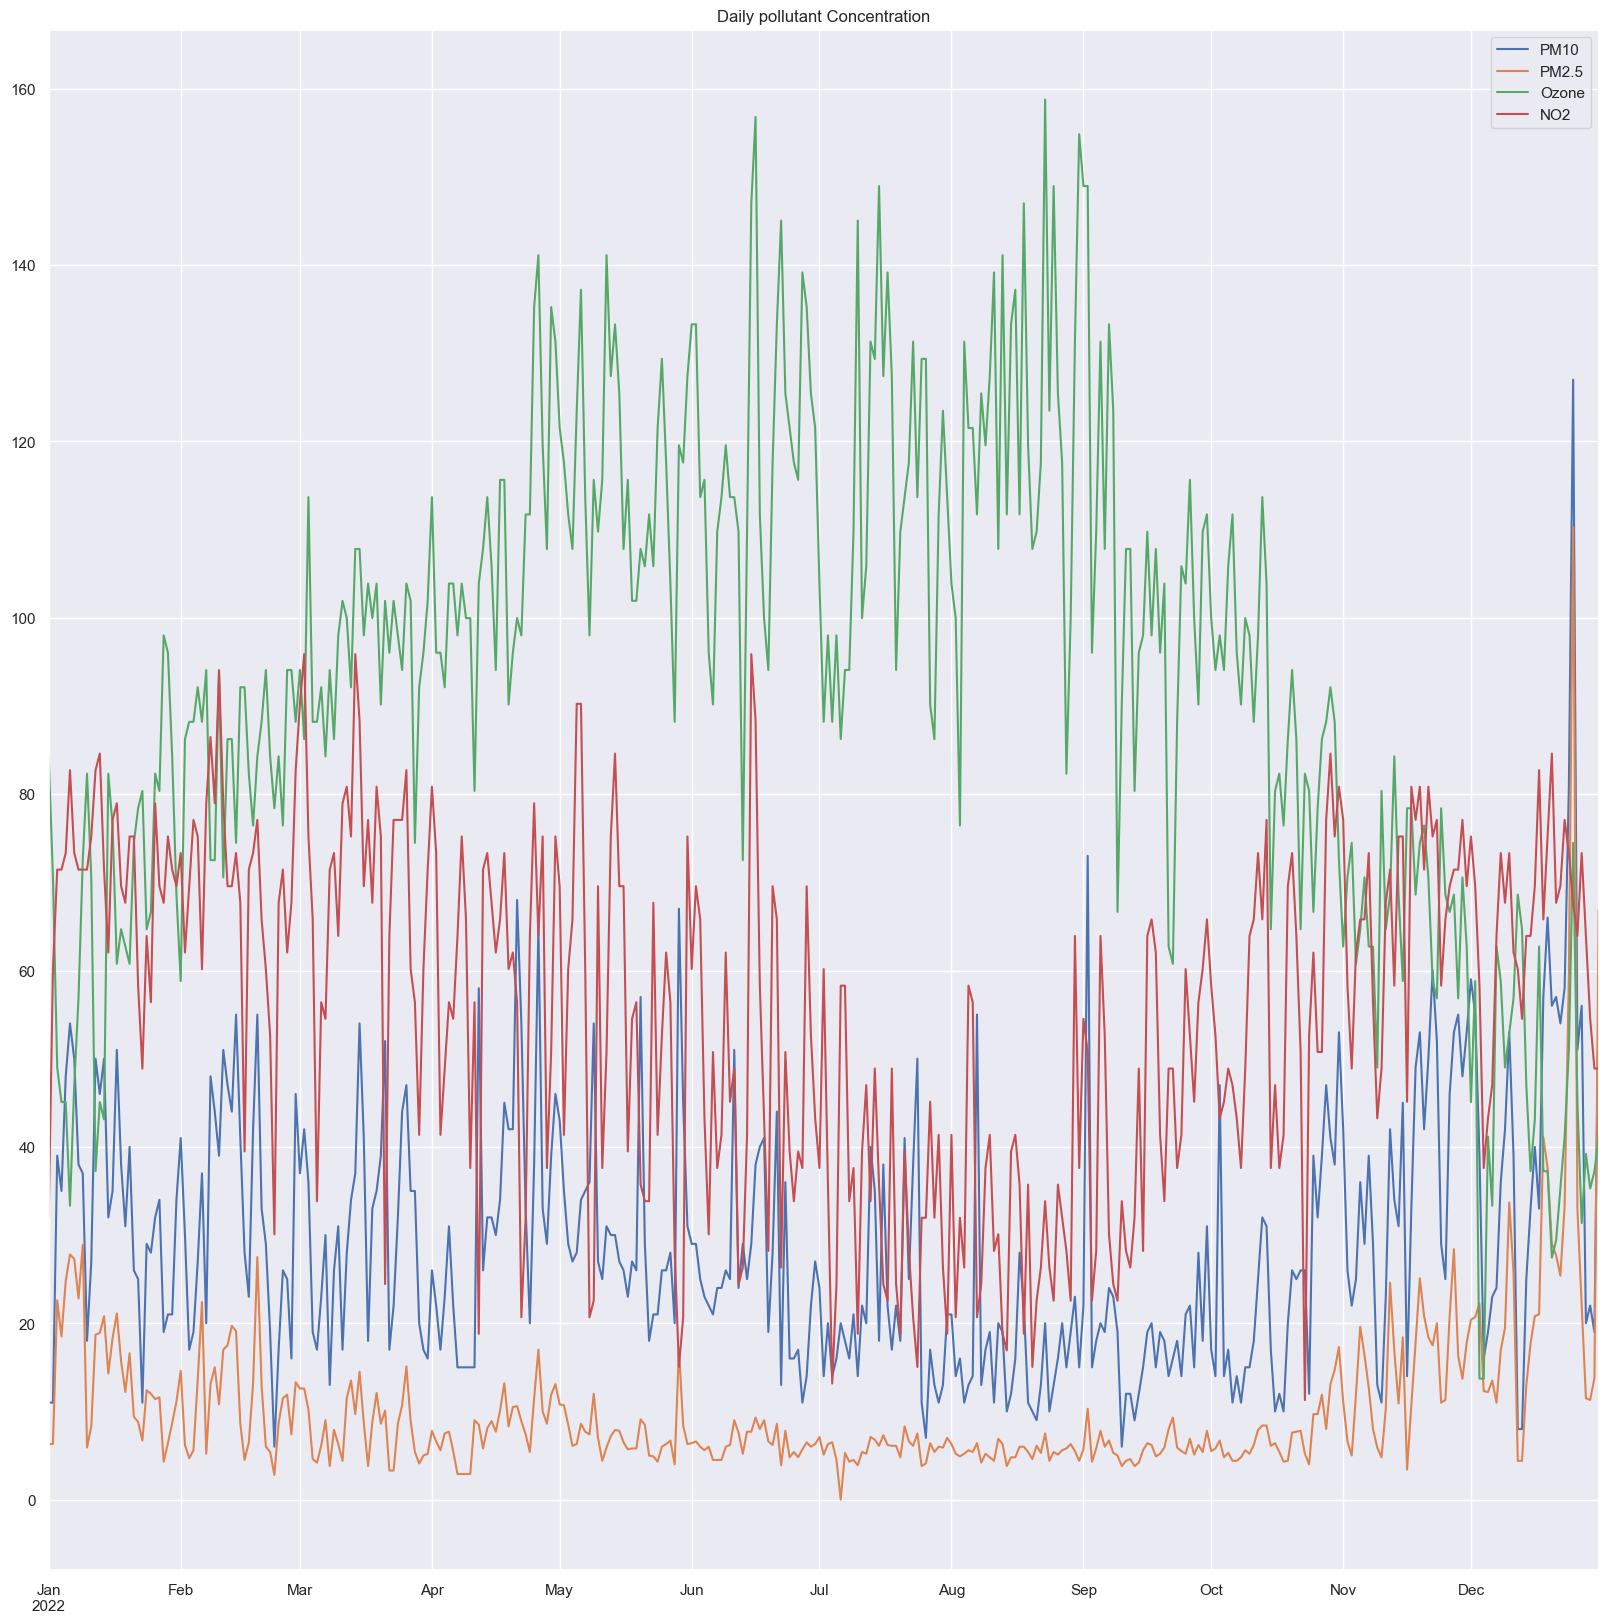

In [115]:
sns.set( rc = {'figure.figsize' : ( 20, 20 ), 
               'axes.labelsize' : 10})
pollutants_concentration["Daily Mean PM10 Concentration (ug/m3 SC)"].plot(label="PM10")
pollutants_concentration["Daily Mean PM2.5 Concentration (ug/m3 LC)"].plot(label="PM2.5")
pollutants_concentration["Daily Max 8-hour Ozone Concentration (ug/m3)"].plot(label="Ozone")
pollutants_concentration["Daily Max 1-hour NO2 Concentration (ug/m3)"].plot(label="NO2")
plt.legend()
plt.title("Daily pollutant Concentration")
plt.show()

### 3. Bar chart for visualizing pollutants concentration for each month of the year 2022

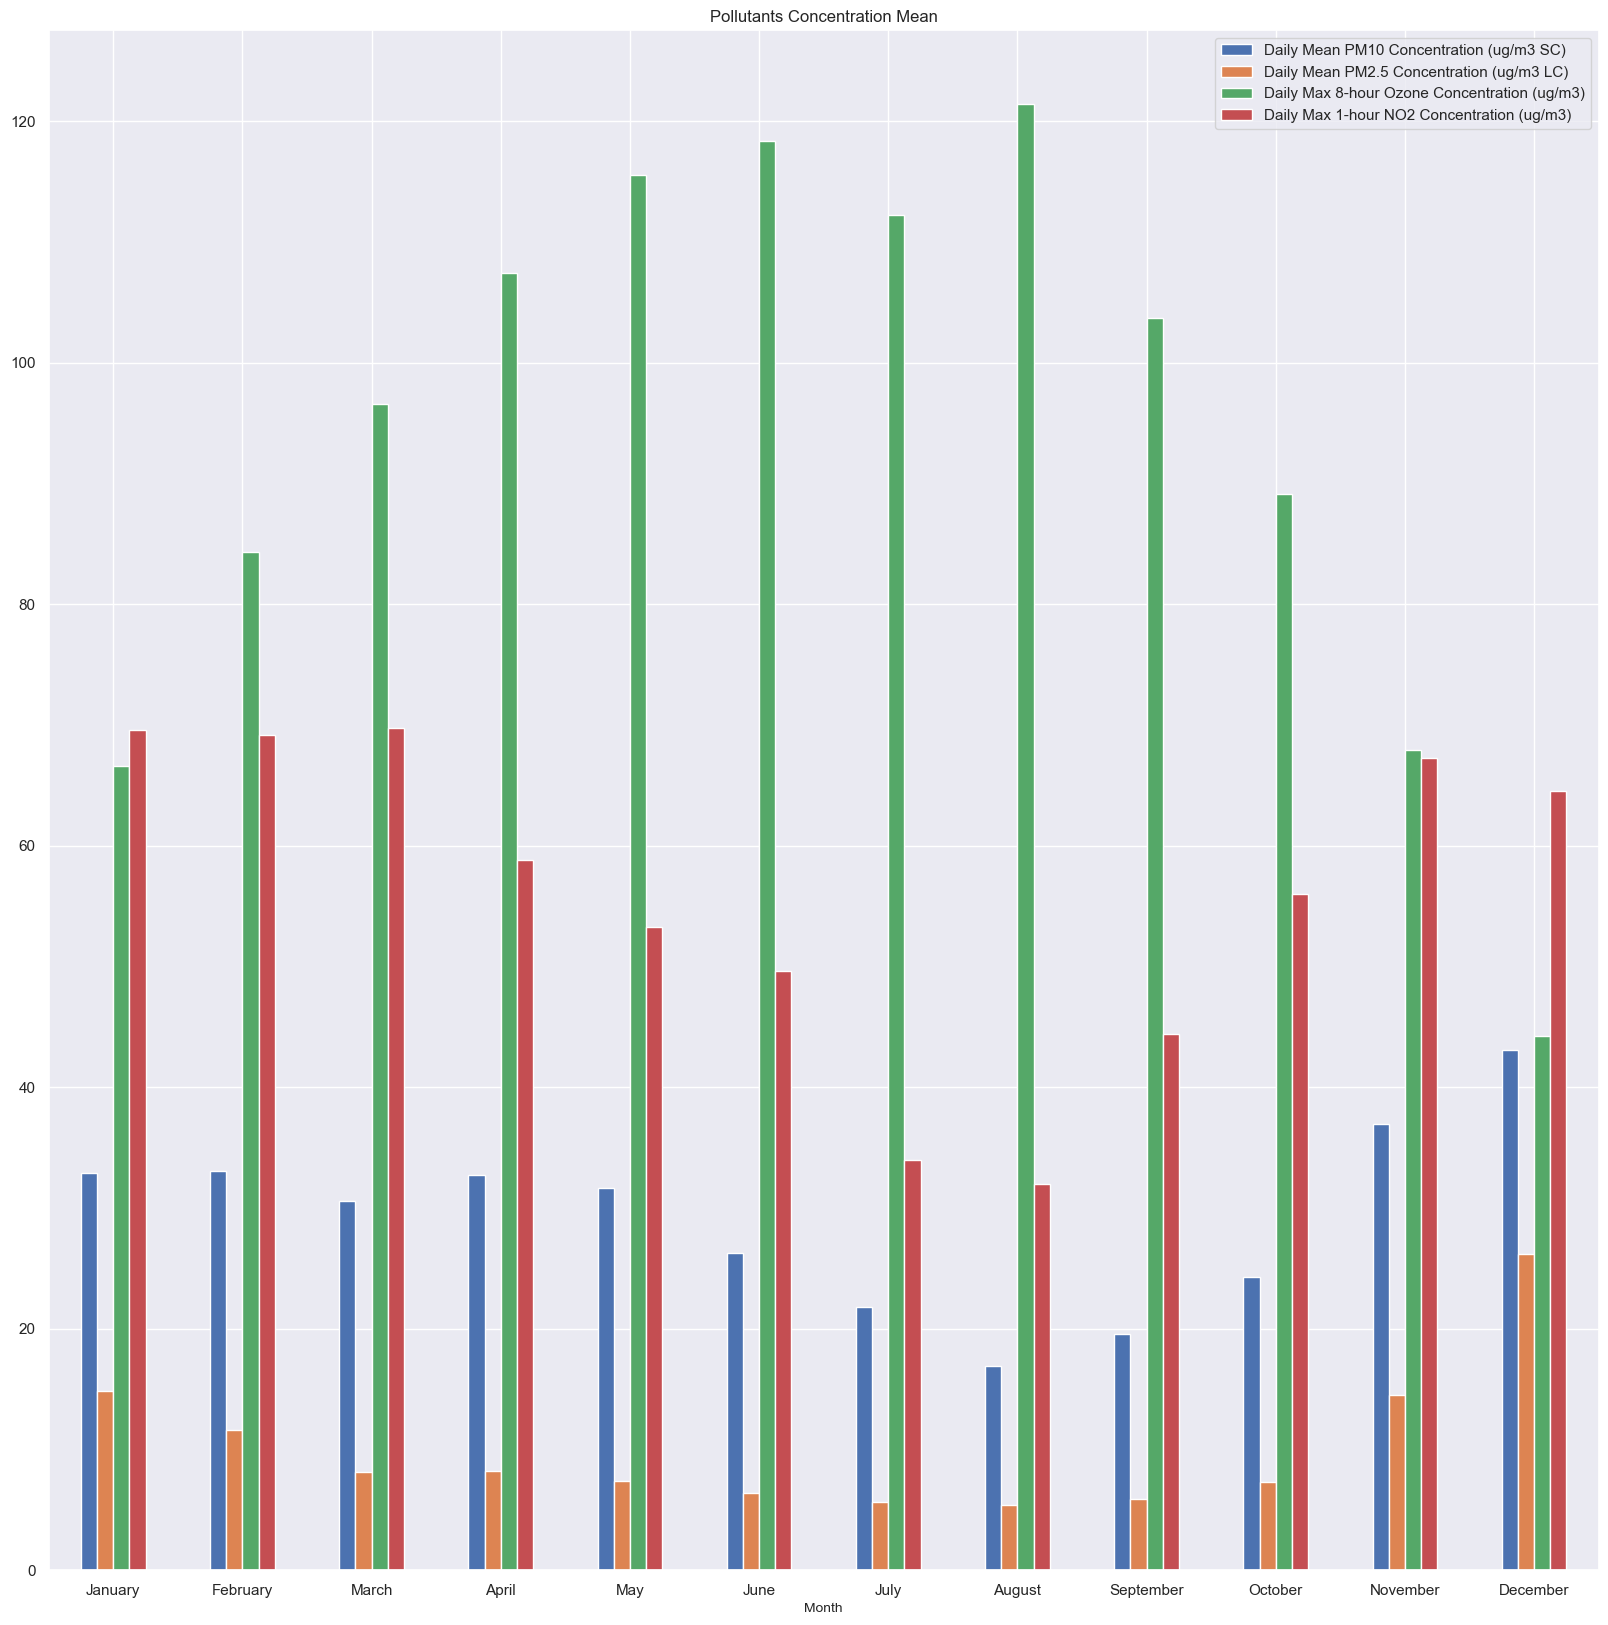

,Daily Mean PM10 Concentration (ug/m3 SC),Daily Mean PM2.5 Concentration (ug/m3 LC),Daily Max 8-hour Ozone Concentration (ug/m3),Daily Max 1-hour NO2 Concentration (ug/m3)
Month,,,,
January,32.935484,14.803226,66.576774,69.620645
February,33.035714,11.596429,84.350000,69.157143
March,30.548387,8.148387,96.545806,69.741935
April,32.733333,8.226667,107.408000,58.781333
May,31.677419,7.377419,115.576774,53.246452
June,26.266667,6.413333,118.384000,49.632000
July,21.806452,5.667742,112.225806,33.961290
August,16.935484,5.406452,121.456774,31.960000
September,19.566667,5.906667,103.684000,44.368000


In [42]:
# get month 
## Extract month from from the index 
pollutants_concentration['Month'] = pollutants_concentration.index.month_name()
chart_data = pollutants_concentration[["Month", "Daily Mean PM10 Concentration (ug/m3 SC)", "Daily Mean PM2.5 Concentration (ug/m3 LC)", "Daily Max 8-hour Ozone Concentration (ug/m3)", "Daily Max 1-hour NO2 Concentration (ug/m3)"]]
## Get the pollutant concentration mean for each month                                
chart_data = chart_data.groupby(["Month"], sort=False).mean()
## plot the bar chart
ax = chart_data.plot.bar(rot=0)
plt.title("Pollutants Concentration Mean")
plt.show()
chart_data

### <ins>Discussion<ins>

The above results show that there is a trend in the evolution of pollutants concentration throughout the year 2022. For instance, the ozone' concentration increases until it reaches a peak in September and then decreases again. It seems that this pollutant is positively correlated to temperature. On the contrary, most of the other pollutants' concentration decreases with the increase in temperature (april-august) and then start increasing again starting from the month of September. 



## III. <ins>Analyze Correlation Between Different Pollutants<ins>

In [43]:
### Create a new dataframe that only contains pollutants with concentrations in (ug/m3)
df_concentrations= pollutants_concentration[["Daily Mean PM10 Concentration (ug/m3 SC)", "Daily Mean PM2.5 Concentration (ug/m3 LC)", "Daily Max 8-hour Ozone Concentration (ug/m3)", "Daily Max 1-hour NO2 Concentration (ug/m3)","Daily Max 8-hour CO Concentration (ug/m3)"]]

### 1.  Pairwise relationship between different pollutants

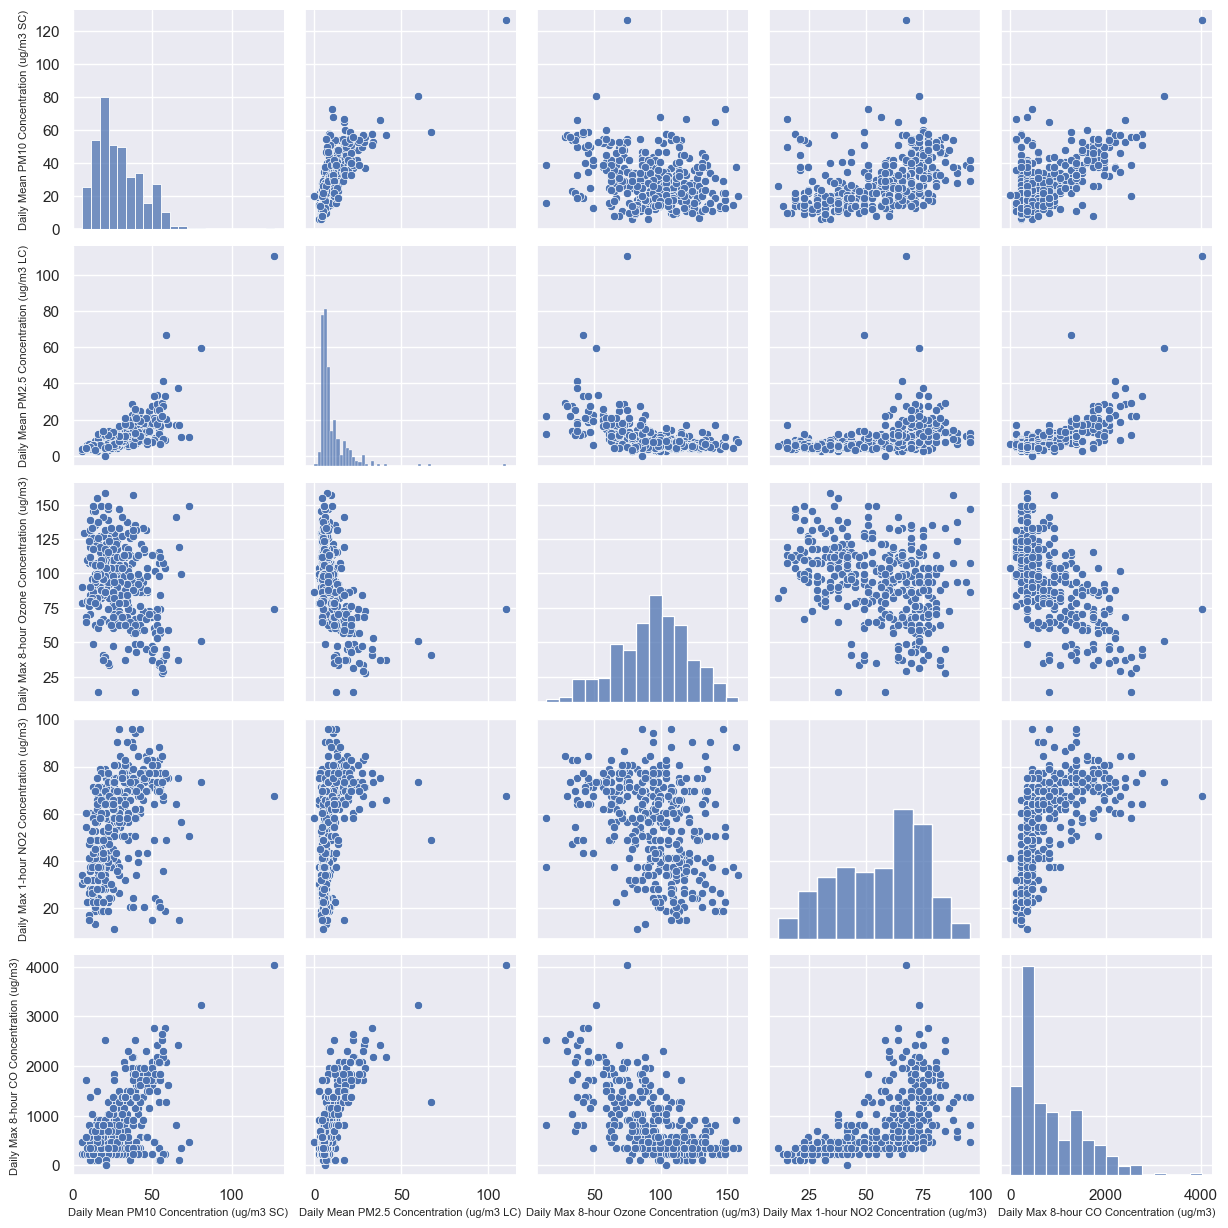

In [44]:
### create a plot that shows the pairwise realtionship between different pollutants
sns.set( rc = {'figure.figsize' : ( 20, 20 ), 
               'axes.labelsize' : 8 })
sns.pairplot(df_concentrations)
plt.show()

### 2. Heatmap showing pollutants correlation values 

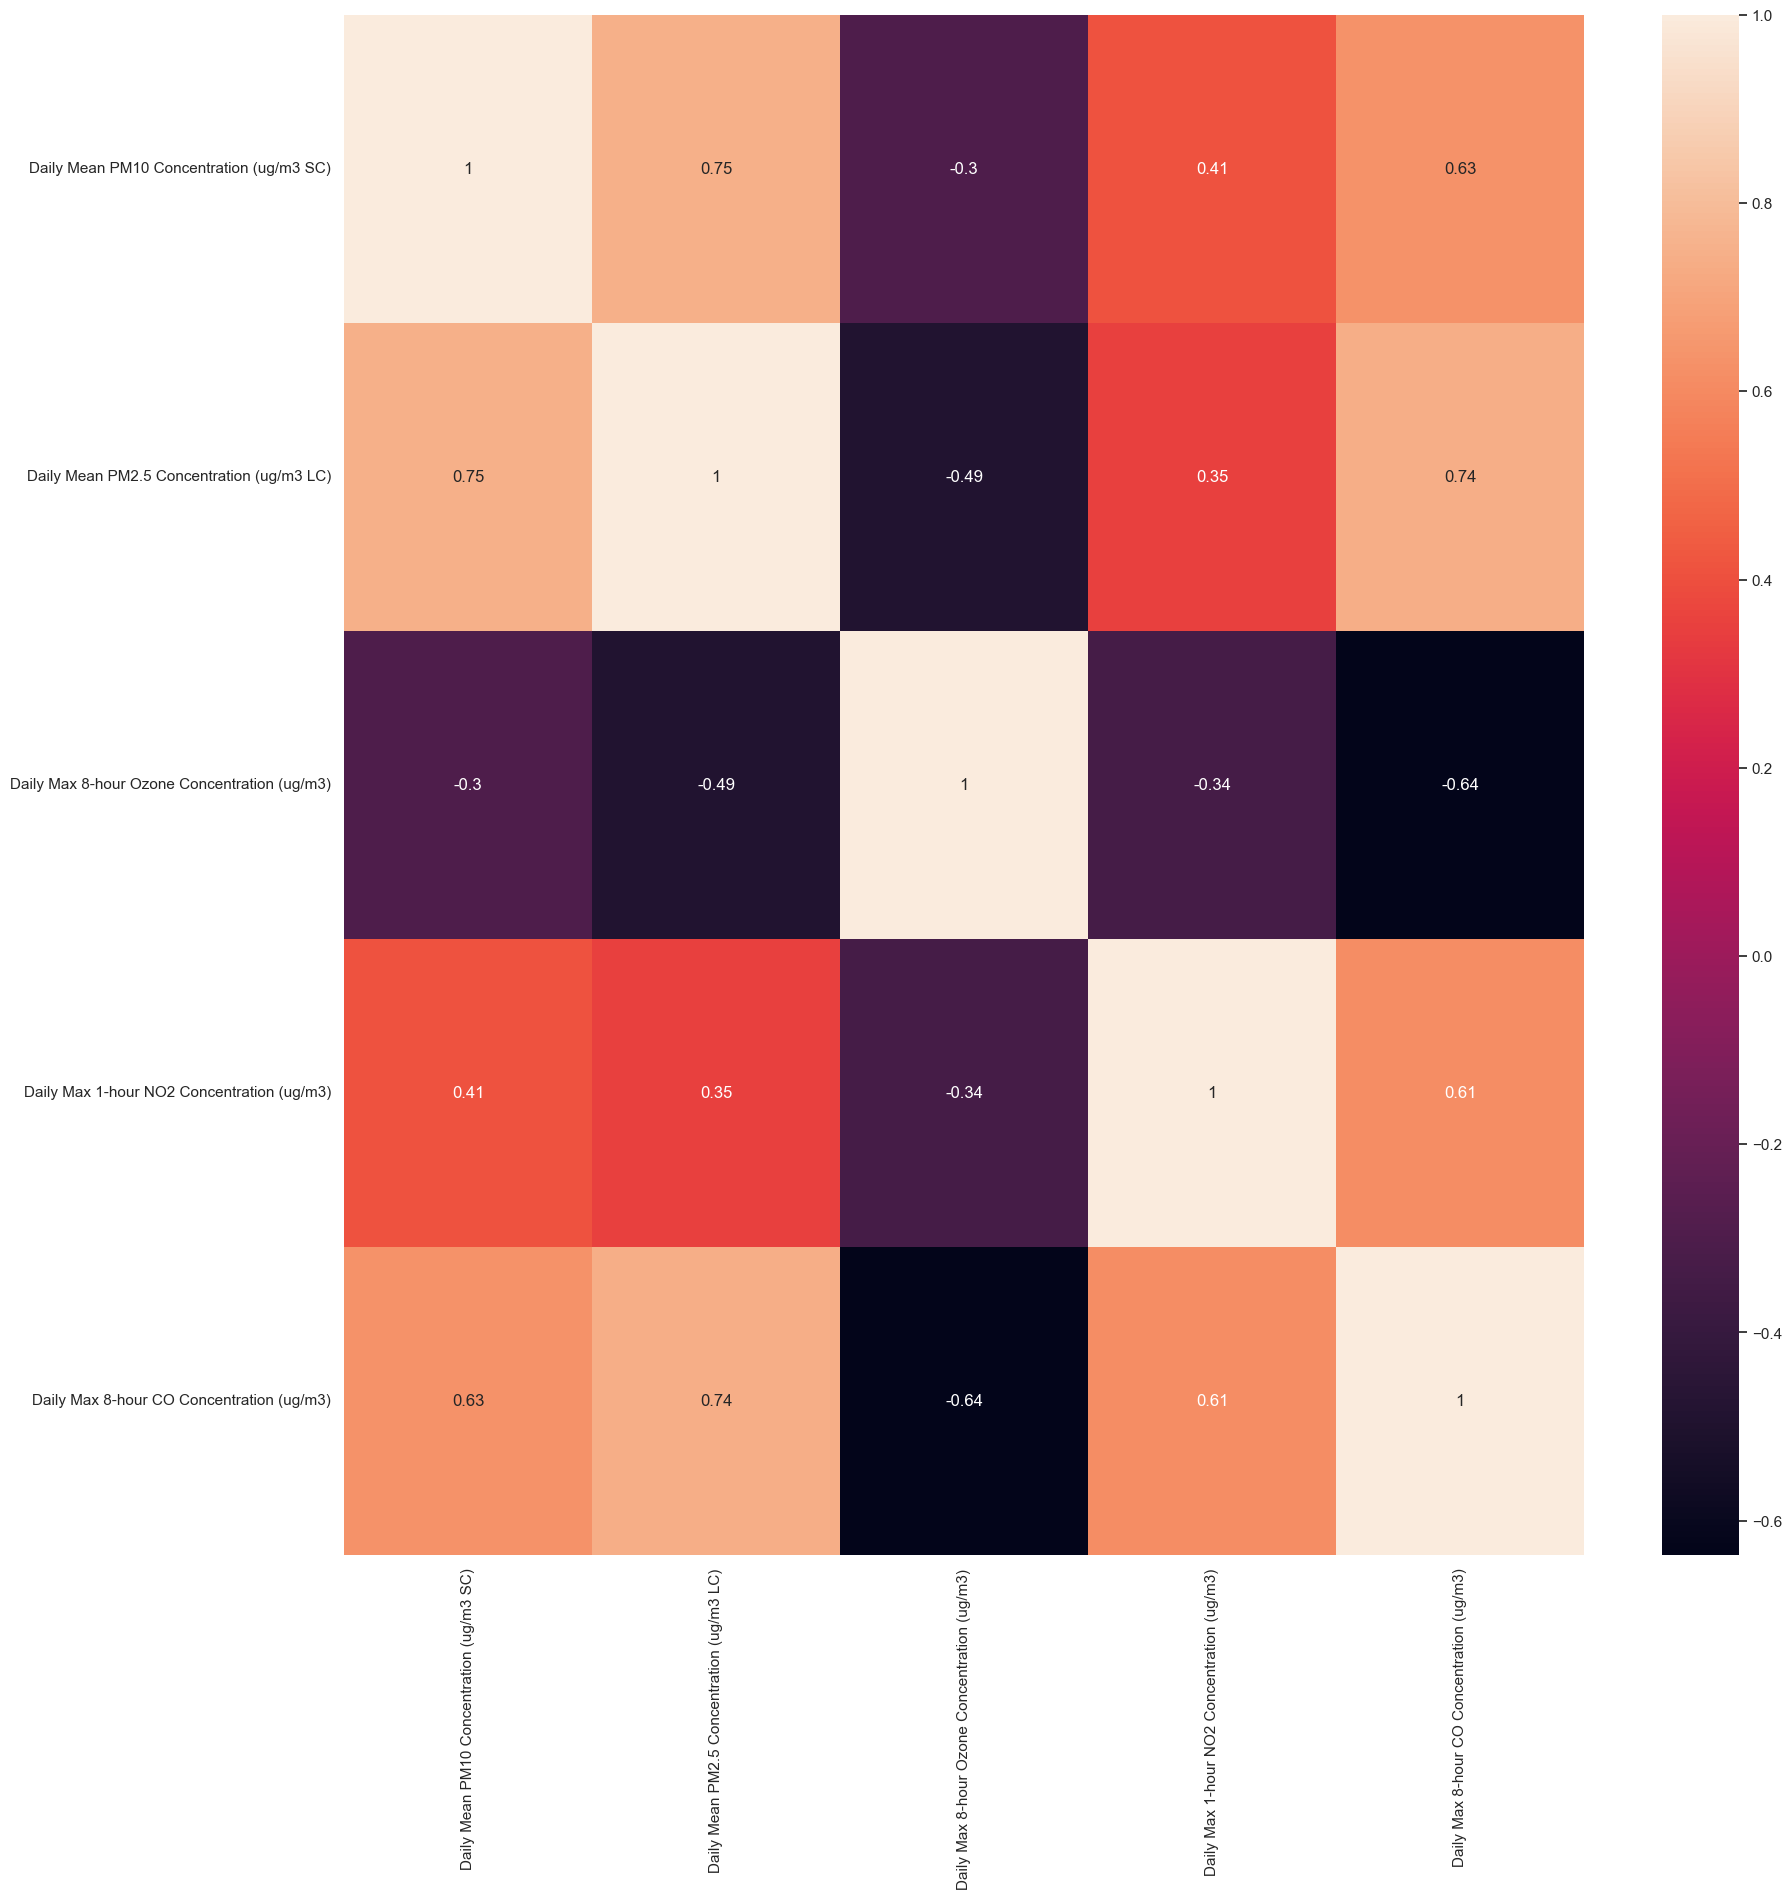

In [45]:
#Create a heatmap of pollutants correlation values 
plt.figure(figsize=(20,20))
sns.heatmap(df_concentrations[df_concentrations.corr().index].corr(),annot=True)
plt.show()

### <ins>Discussion<ins>
The above results show that the PM2.5 pollutant is highly correlated to the PM10 and CO. Therefore, only these two pollutants will be used in subsequent parts to predict the PM2.5 concentration using machine learning  



## IV. <ins> Analyze correlation between pollutants and meteorological data for phoenix for year 2022<ins>

### 1. Import weather information for phoenix for year 2022 

In [88]:
weather_data= pd.read_csv("phoenix weather history 2022.csv")
new_date_range = pd.date_range(start="2022-01-01", end="2022-12-31", freq="D")
weather_data=weather_data.set_index(new_date_range)
weather_data

,Max Temp (°F),Avg Temp (°F),Min Temp (°F),Max Dew Point (°F),Avg Dew Point (°F),Min Dew Point (°F),Max Humidity (%),Avg Humidity (%),Min Humidity (%),Max Wind Speed (mph),Avg Wind Speed (mph),Min Wind Speed (mph),Max Pressure (in),Avg Pressure (in),Min Pressure (in),Total Precipitation (in)
2022-01-01,56,51.1,42,49,28.0,10,86,46.0,17,22,13.0,3,29.1,28.8,28.5,0.08
2022-01-02,59,47.6,36,30,20.5,10,70,39.1,16,13,5.3,0,29.2,29.1,29.0,0.00
2022-01-03,66,51.3,40,34,27.0,21,68,42.6,18,9,2.5,0,29.0,29.0,28.9,0.00
2022-01-04,65,52.4,42,37,31.6,26,67,48.2,23,9,4.3,0,29.0,28.9,28.9,0.00
2022-01-05,66,52.7,41,38,33.7,28,79,52.3,24,7,3.1,0,28.9,28.9,28.8,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,71,60.4,49,41,37.1,33,66,44.5,25,9,3.6,0,28.9,28.8,28.6,0.00
2022-12-28,62,54.5,52,52,48.6,39,93,81.8,43,16,6.7,0,28.8,28.7,28.6,0.00
2022-12-29,62,55.1,48,49,46.3,44,93,73.4,53,9,5.0,0,28.8,28.8,28.7,0.58
2022-12-30,59,55.5,53,53,50.7,48,93,84.2,67,8,4.0,0,28.9,28.9,28.8,0.07


In [89]:
### Only keep the average temperature, humidity, wind speed, and total precipitation will be used in this study
weather_data = weather_data[["Avg Temp (°F)", "Avg Dew Point (°F)", "Avg Humidity (%)", "Avg Wind Speed (mph)", "Avg Pressure (in)", "Total Precipitation (in)"]]
weather_data

,Avg Temp (°F),Avg Dew Point (°F),Avg Humidity (%),Avg Wind Speed (mph),Avg Pressure (in),Total Precipitation (in)
2022-01-01,51.1,28.0,46.0,13.0,28.8,0.08
2022-01-02,47.6,20.5,39.1,5.3,29.1,0.00
2022-01-03,51.3,27.0,42.6,2.5,29.0,0.00
2022-01-04,52.4,31.6,48.2,4.3,28.9,0.00
2022-01-05,52.7,33.7,52.3,3.1,28.9,0.00
...,...,...,...,...,...,...
2022-12-27,60.4,37.1,44.5,3.6,28.8,0.00
2022-12-28,54.5,48.6,81.8,6.7,28.7,0.00
2022-12-29,55.1,46.3,73.4,5.0,28.8,0.58
2022-12-30,55.5,50.7,84.2,4.0,28.9,0.07


### 2. Merge the meterological and pollutants concentration (keeping PM2.5, PM10, and CO only) datasets

In [120]:
###  From Section II.3, we found that the PM2.5 concentration is only highly correlated to the PM10 and CO's concentration
### Create a new dataframe that contains these three pollutants only 
df_concentrations_corr = df_concentrations[["Daily Mean PM10 Concentration (ug/m3 SC)", "Daily Max 8-hour CO Concentration (ug/m3)", "Daily Mean PM2.5 Concentration (ug/m3 LC)"]]
### Merge the df_concentrations_corr and weather_data dataframes
pollutant_weather_dataset= weather_data.merge(df_concentrations_corr,left_index=True, right_index=True, how="left")
pollutant_weather_dataset

,Avg Temp (°F),Avg Dew Point (°F),Avg Humidity (%),Avg Wind Speed (mph),Avg Pressure (in),Total Precipitation (in),Daily Mean PM10 Concentration (ug/m3 SC),Daily Max 8-hour CO Concentration (ug/m3),Daily Mean PM2.5 Concentration (ug/m3 LC)
2022-01-01,51.1,28.0,46.0,13.0,28.8,0.08,11.0,115.0,6.3
2022-01-02,47.6,20.5,39.1,5.3,29.1,0.00,11.0,1380.0,6.3
2022-01-03,51.3,27.0,42.6,2.5,29.0,0.00,39.0,1725.0,22.6
2022-01-04,52.4,31.6,48.2,4.3,28.9,0.00,35.0,1380.0,18.5
2022-01-05,52.7,33.7,52.3,3.1,28.9,0.00,48.0,1725.0,24.8
...,...,...,...,...,...,...,...,...,...
2022-12-27,60.4,37.1,44.5,3.6,28.8,0.00,56.0,2645.0,22.1
2022-12-28,54.5,48.6,81.8,6.7,28.7,0.00,20.0,2530.0,11.5
2022-12-29,55.1,46.3,73.4,5.0,28.8,0.58,22.0,690.0,11.3
2022-12-30,55.5,50.7,84.2,4.0,28.9,0.07,19.0,805.0,13.8


### 3. Study correlation between pollutants and weather conditions

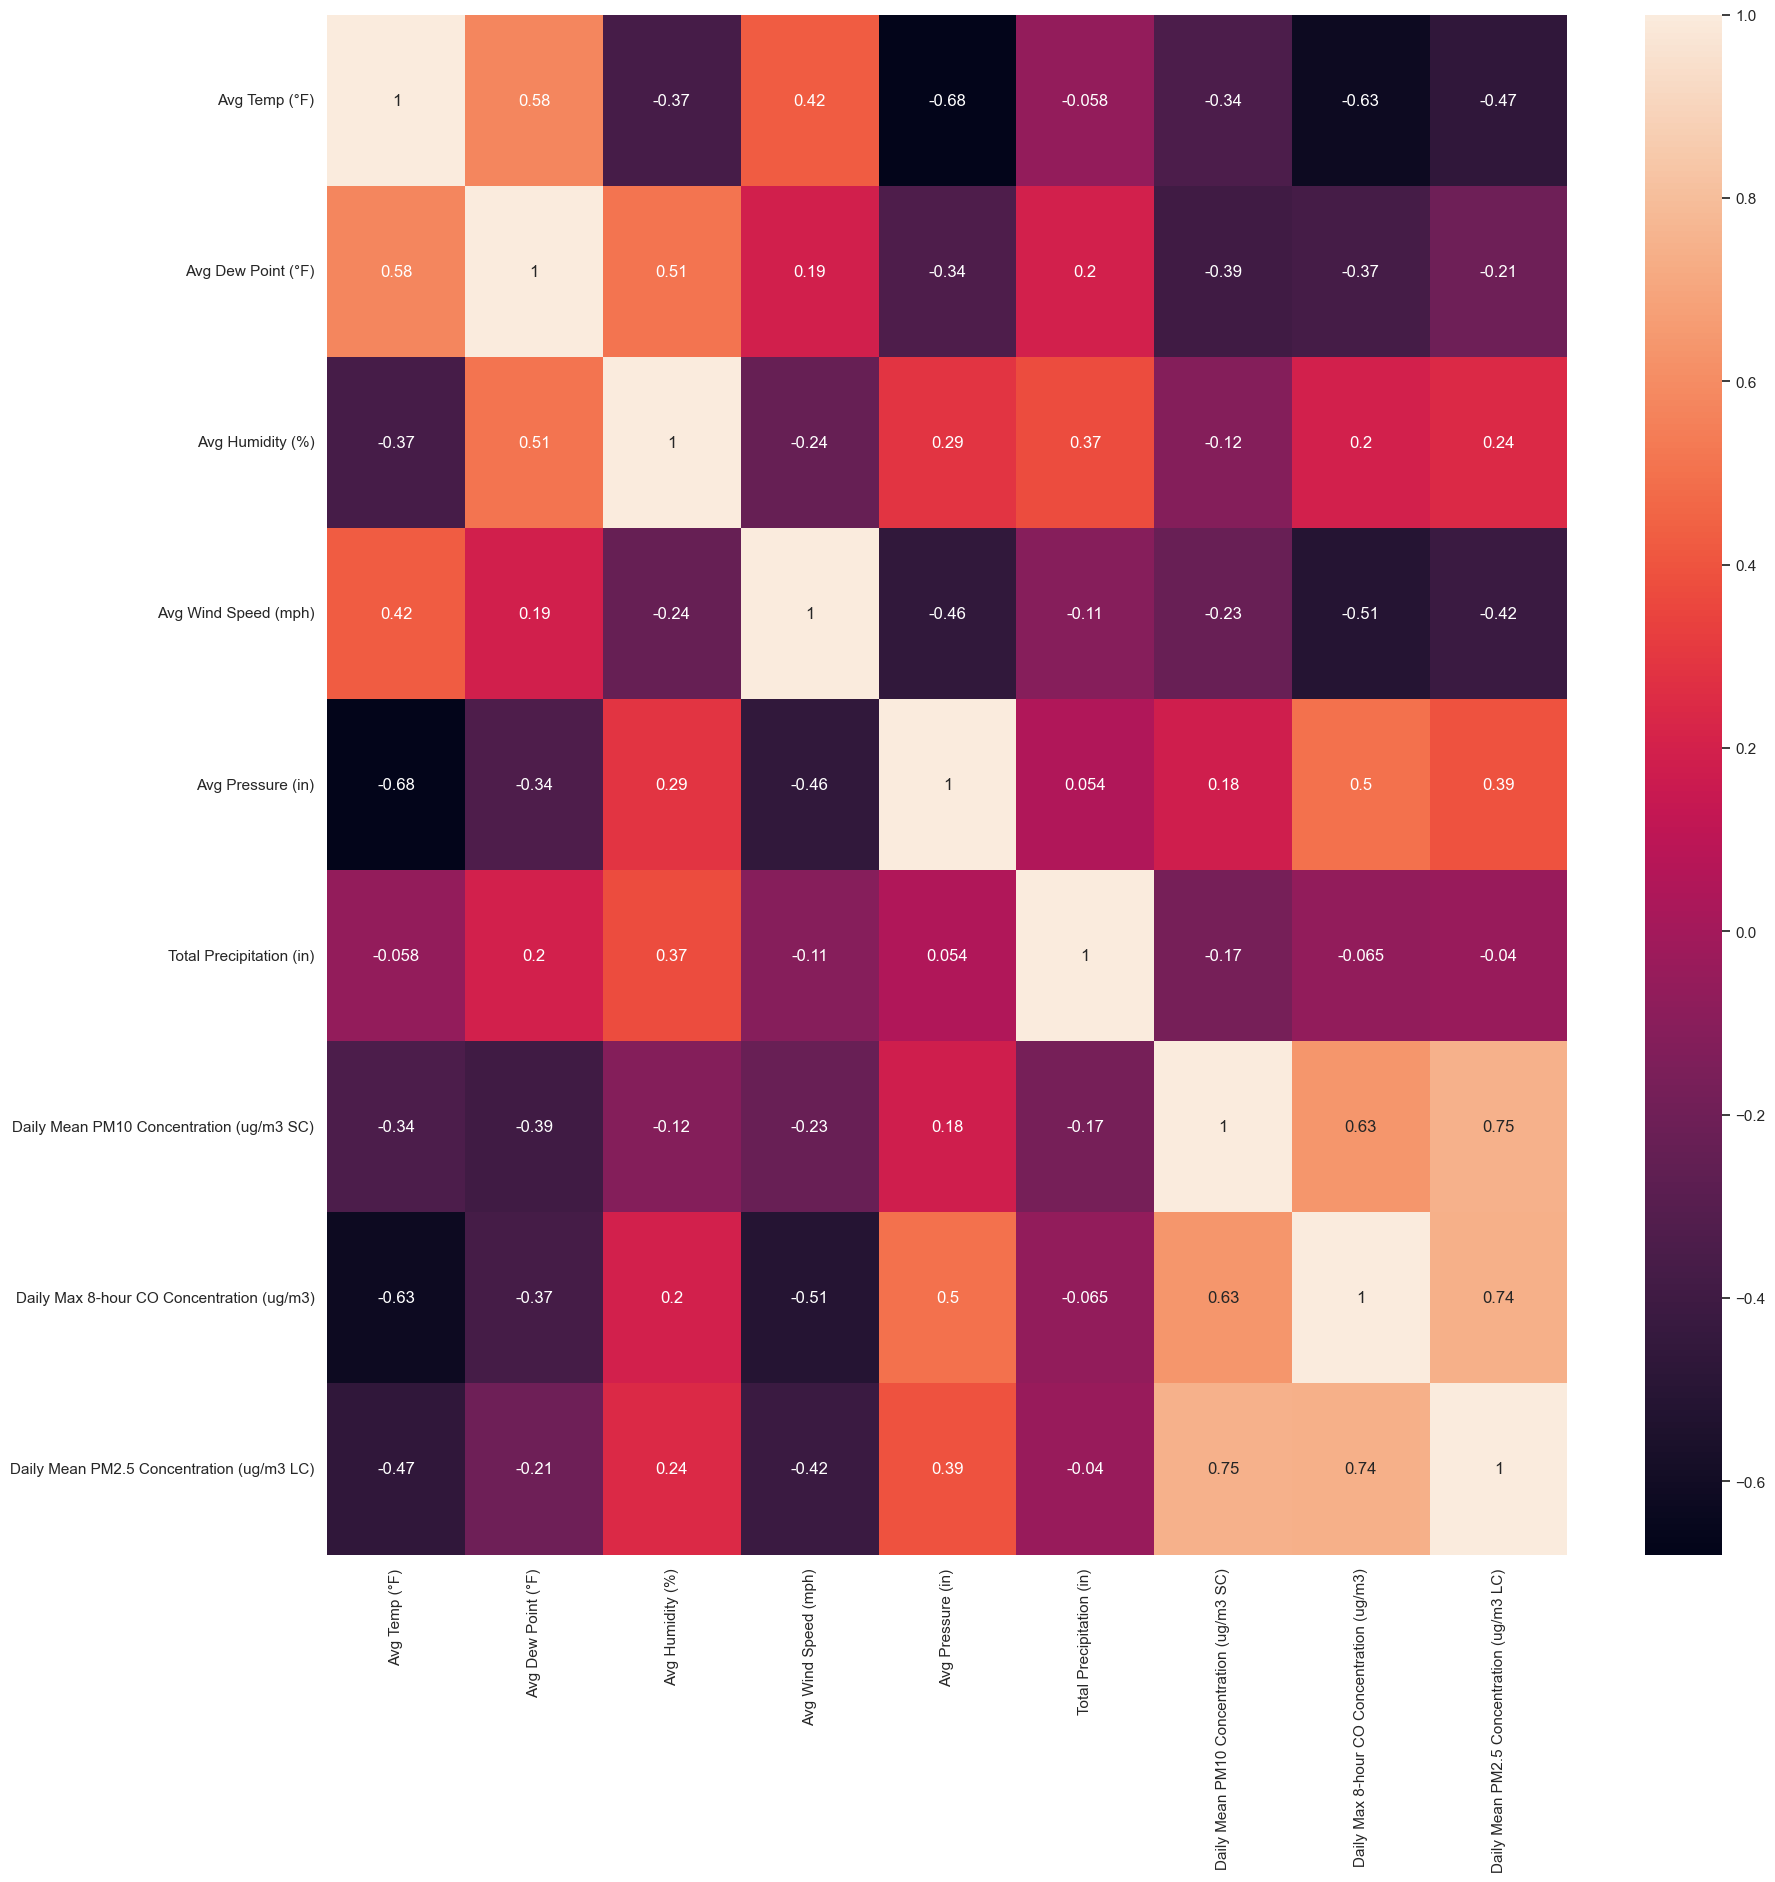

In [91]:
#Create a heatmap of weather conditions/pollutants correlation values 
plt.figure(figsize=(20,20))
sns.heatmap(pollutant_weather_dataset[pollutant_weather_dataset.corr().index].corr(),annot=True)
plt.show()

### <ins>Discussion<ins>

As expected based on the results in Section II.3, the PM2.5 concentration is negatively correlated to temperature. Surprisingly, the concentration of this pollutant is more correlated to the PM10 and CO's concentrations than meteorological data. 



## V. <ins>PM2.5 Concentration Prediction Using Machine Leaning: Random Forest (RF)<ins>

In [92]:
### Import important libraries 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import pickle ## to save trained model

### 1. Divide dataset into training and testing data

In [93]:
### Divide the dataset into dependent and independant variables 
X_PM25 = pollutant_weather_dataset.drop(["Daily Mean PM2.5 Concentration (ug/m3 LC)"], axis=1)
#X = weather_data.values
Y_PM25 = pollutant_weather_dataset["Daily Mean PM2.5 Concentration (ug/m3 LC)"]
### Split data into training (80%) and testing (20%) sets 
x_train_PM25, x_test_PM25, y_train_PM25, y_test_PM25 = train_test_split(X_PM25, Y_PM25, test_size=0.2, random_state=0)

### 2. Initialize and train RF model

In [94]:
### RF Model for PM2.5
Model_PM25 = RandomForestRegressor(n_estimators = 100, random_state = 7)
# fit the regressor with x and y data
Model_PM25 = Model_PM25.fit(x_train_PM25, y_train_PM25)

### 3. Make predictions on testing dataset and display model's performance  

In [95]:
y_pred_PM25 = Model_PM25.predict(x_test_PM25)
R2_score= r2_score(y_pred_PM25,y_test_PM25)
mean_squared_error_PM25 = mean_squared_error(y_pred_PM25,y_test_PM25)
print("R2_score for PM2.5: ", R2_score)
print("Mean squared error for PM2.5: ", mean_squared_error_PM25)

R2_score for PM2.5:  0.829752048357658
Mean squared error for PM2.5:  4.188717356164386


### 4. Save the trained model for future use 

In [155]:
name = "RF_Model_PM2.5"
pickle.dump(Model_PM25, open(name, 'wb'))

## VI. <ins>Create an Air Quality Prediction Web App Using Streamlit<ins>

In [96]:
from PIL import Image
import streamlit as st
import pickle

### 1. Web app introduction

In [109]:
# Web App Title 
st.write("""
# Air Quality Prediction Using Machine Learning:
""")

In [110]:
# Add a representative image
image = Image.open("maxresdefault.jpg")
st.image(image, caption="Taken from: EdimaxTV", use_column_width=True)

DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [132]:
# Add introduction
st.write("""
## Introduction

Air pollution is a very important issue in today's society. This project aims to use leverage the use of machine learning to 
predict the concentration of Particulate Matter (PM2.5) pollutant based on meteorological data and other pollutants'concentration

##### Five pollutants were used in this analysis:
- Particulate Matter (PM2.5)
- Particulate Matter (PM10)
- Nitrogen Dioxide (NO2)
- Ozone (O3)
- Carbon monoxide (CO)
  
##### Datasets references:
- United States Environmental Protection Agency(EPA): https://www.epa.gov/outdoor-air-quality-data/download-daily-data (for daily air quality data)
- Wunderground: https://www.wunderground.com/weather/KPHX (for meteorological data)
    
##### Python libraries used:
- Pandas, Numpy, Matplotlib, Seaborn, os, glob, Sklearn, Streamlit

""")


In [128]:
df = pollutant_weather_dataset
df1 = pollutant_weather_dataset.drop(["Daily Mean PM2.5 Concentration (ug/m3 LC)"], axis=1)

### 2. Get information from user

In [130]:
# Define sliders features that will be used by the user to enter meteorological values and pollutants (PM10 and CO) concentration 
def data_entered():
    user_data = {}
    for feature in df1.columns: 
        slider_max = (df1[feature].max()) # get columns maximum value 
        if 'int' in str(type(df1[feature][0])): # this is for columns containing integer values 
            data = st.sidebar.slider(str(feature), 0, slider_max+0.5*slider_max, 0) # define the range of sliders value from 0 to 1.5*columns maximum value
        else:
            data = st.sidebar.slider(str(feature), 0.0, slider_max+0.5*slider_max, 0.0) # this is for columns containing float values 
        user_data[feature] = data
    features = pd.DataFrame(user_data, index=[0]) # create a dataframe that contains features values 
    return features

# Store the data entered by the user into a variable
user_input = data_entered()

# Get data from user to make prediction and display those values in a table 
st.subheader("Enter Weather Data: ")
st.write(user_input)

### 3. Predict and display predicted PM2.5 concentration based on values entered by user

In [131]:
### Import RF model trained in section V
RF_model = pickle.load(open("RF_Model_PM2.5", 'rb'))

### Make prediction 
predicted_PM25 = RF_model.predict(user_input)

### Display predicted result
st.subheader("Predicted PM2.5 Concentration Using Random Forest: (R-square= 82.98%)")
st.write(predicted_PM25)

### 4. Data visualization 

In [129]:
# 1. plot pollutants concentration evolution with time 
st.subheader("Pollutants Concentration History for 2022 in City of Phoenix") # add subheader
pollutants_concentration1= pollutants_concentration[["Daily Mean PM10 Concentration (ug/m3 SC)", "Daily Mean PM2.5 Concentration (ug/m3 LC)", "Daily Max 8-hour Ozone Concentration (ug/m3)", "Daily Max 1-hour NO2 Concentration (ug/m3)"]]
st.line_chart(pollutants_concentration1)# display plot 

# 2. Display data statistics
st.subheader("Pollutants Concentration Statistics of the Year 2022") # add subheader
st.write(df.describe()) # diplay table containing each column's statistics 

# 3. Display chart bar
st.subheader("Pollutants Concentration Mean Value for Each Month of the Year 2022") # add subheader
chart = st.bar_chart(chart_data) # diplay bar chart

# 4. Display PM2.5 correlation with meteorological data and other pollutants concentration
st.subheader("PM2.5 Correlation With Meteorological Data and Other Pollutants Concentration")
fig, ax = plt.subplots()
sns.heatmap(pollutant_weather_dataset[pollutant_weather_dataset.corr().index].corr(),annot=True)
st.write(fig) # diplay heatmap


#### Note:
I used ref. (https://www.youtube.com/watch?v=y3qZFu3gmYE) to build the web app. 
The differences:
- I used streamlit to built the app for air quality monitoring while they used it to predict whether a person has diabetes or not. 
- Definition of sliders as part of the data_entered() function
- I used the model trained in Section V to make prediction based on data entered by user
- The data visualization techniques used in my web app are different than those used for their app (I included plots for pollutants concentration history, heatmap, bar chart)